## 12. 회귀분석
### - 단순회귀모형
### - 중회귀모형
### - 모형의 선택
### - 모형의 타당성

* 회귀분석에 의해 변수 사이의 인과관계가 명확해지고 한 변수가 다른 변수에 끼치는 영향을 추정할 수 있음
* 모형 $\rightarrow$ 현실 세계에서 발생하는 복잡한 현상의 특징을 잘 포착하여 단순화한 것
* 회귀분석의 목적 $\rightarrow$ 복잡한 현상을 사람이 이해할 수 있을 정도의 간단한 구조로 충분히 설명할 수 있는 모형을 찾는 것이 목적

In [1]:
# 기존에 사용했던 라이브러리에 statsmodels를 추가
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

%precision 3
%matplotlib inline

In [2]:
# 시용할 데이터 불러오기
df = pd.read_csv(r'E:\jupyter\누구나 파이썬 통계분석\ch12_scores_reg.csv')
n = len(df)
print(n)
df.head()

20


,quiz,final_test,sleep_time,school_method
0,4.2,67,7.2,bus
1,7.2,71,7.9,bicycle
2,0.0,19,5.3,bus
3,3.0,35,6.8,walk
4,1.5,35,7.5,walk


#### 1. 단순회귀모형
* 회귀분석(regression analysis) $\rightarrow$ 인과관계가 의심되는 복수의 변수를 사용하여 어느 변수로부터 다른 변수의 값을 예측하는 기법
  - 원인이 되는 변수 $\rightarrow$ 설명변수(explanatory variable) (= 독립변수; independent variable)
  - 결과가 되는 변수 $\rightarrow$ 반응변수(response variable) (= 종속변수; dependent variable)
* 단순회귀모형(simple regression model) $\rightarrow$ 설명변수와 반응변수가 1개씩인 가장 단순한 모델
* 회귀분석에서의 가설
  - $y = {\beta_0} + {\beta_1{x}}$를 가정
  - 그러나 데이터는 직선과 완전히 일치하지는 않음
  - 기본적인 관계는 직선상에 있다고 생각하고, 다른 요인에 관해서는 예측할 수 없는 확률적인 것이라고 생각
  - 예측할 수 없는 부분을 오차항(error term)이라고 함 $\rightarrow$ $\epsilon_i$
  - 다시... $Y_i = {\beta_0} + {\beta_1{x}} + \epsilon_i$  $(i=1,2,\dots,n)$
  - 회귀분석에서는 추가적으로 두 가지를 가정
    + 설명변수가 확률변수는 아니다
    + $\epsilon_i$는 서로 독립이고 $N(0,\sigma^2)$을 따른다
  - 위 가정에 의해 확률변수 $Y_i$는 서로 독립이고 $N({\beta_0} + {\beta_1}{x_i}, \sigma^2$을 따르는 것을 알 수 있음
  - 회귀분석은 이러한 가정을 기초로 표본인 $(x_1,Y_1),(x_2,Y_2),\dots,(x_n,Y_n)$으로부터 모수 $\beta_0$과 $\beta_1$을 추정함
  - 회귀직선(regression line): $\beta_0$과 $\beta_1$의 추정값 $\hat{\beta_0}$과 $\hat{\beta_1}$에 의해 생성되는 직선 $\rightarrow$ $y = \hat{\beta_0} + \hat{\beta_1}{x}$ 
  - $\hat{\beta_0}$과 $\hat{\beta_1}$은 회귀계수(regression coefficient)라고 함
* statsmodels에 의한 회귀분석
  - smf.ols 함수를 활용하여 설명변수와 반응변수의 관계를 나타낸 문자열과 DataFrame을 전달하고, 추가로 fit 메서드를 호출하여 실행할 수 있음
    + OLS = 최소제곱법(Ordinary Least Squares)
* 회귀계수
  - 점추정
    + 추정값이 생성한 직선 $y = \hat{\beta_0} + \hat{\beta_1}{x}$, 즉 회귀직선은 데이터 $(x_1,y_1),(x_2,y_2),\dots,(x_n,y_n)$에 가장 잘 들어맞는 직선
    + '데이터에 가장 잘 들어맞는 직선' $\rightarrow$ $x_i$로부터 예측된 모형의 예측값(predicted value) $\hat{y_i} = \hat{\beta_0} + \hat{\beta_1}x_i$와 실제의 데이터 $y_i$의 차이가 가장 작은 직선
    + 엄밀하게는 $y_i - \hat{y_i}$의 차이를 잔차(residual), 그 제곱합인 잔차제곱합(residual sum of squares; RSS) $\sum_i^n{\hat{\epsilon^2}}$이 더욱 작은 직선으로서 정의
    + 잔차제곱합을 최소화하는 $\hat{\beta_0}$과 $\hat{\beta_1}$을 구하는 방법을 최소제곱법이라고 함
    + 최소제곱법으로 구한 $\hat{\beta_0}$과 $\hat{\beta_1}$은 $\beta_0$과 $\beta_1$의 불편일치추정량이 됨
  - 구간추정
    + $\beta_0$과 $\beta_1$의 구간추정 $\rightarrow$ $\hat{\beta_0}$과 $\hat{\beta_1}$의 표준오차가 필요
    + $\hat{\beta_0}$과 $\hat{\beta_1}$의 표준오차를 구하는 것은 복잡함
    + 결과만 기록하면 각각 $\sqrt{{C_0}{\hat{\sigma^2}}}$과 $\sqrt{{C_1}{\hat{\sigma^2}}}$이 됨
    + 다만 $(XX^T)^{-1}$의 대각성분의 첫 번째가 $C_0$, 두 번째가 $C_1$이 됨
  - t검정
    + 회귀계수에 대한 가설검정
    + 귀무가설: $\beta_1 = 0$
    + 대립가설: $\beta_1 \neq 0$
    + $\beta_1$에 대해서도 동일한 가설검정을 고려하겠지만, $\beta_1$에 대한 가설검정에는 중요한 의미가 있음
    + $\beta_1 = 0$인 경우, $y_i = {\beta_0} + 0 \times x_i + {\epsilon_i} = \beta_0 + {\epsilon_i}$
    + 위와 같을 때, 설명변수가 반응변수에 전혀 영향을 끼치지 않는 모형이 되므로, 귀무가설이 기각되어 $\beta_1 \neq 0$이라는 결론을 얻게 됨
    + 따라서 설명변수가 반응변수에 영향을 끼치지 않는다고 주장할 수 있게 됨
    + 이 가설검정의 검정통계량은 $t = {{\hat{\beta_1} - \beta_1} \over {\sqrt{{\sigma^2}C_1}}}$
    + t도 역시 잔차의 제약으로부터 자유도가 n-2인 t분포를 따른다. 더 나아가 귀무가설은 $\beta_1 = 0$이므로 $t = {{\hat{\beta_1}} \over {\sqrt{{\sigma^2}C_1}}}$

In [3]:
# 쪽지시험의 평균 점수: 설명변수, 기말고사 점수: 반응변수
x = np.array(df['quiz'])
y = np.array(df['final_test'])
p = 1

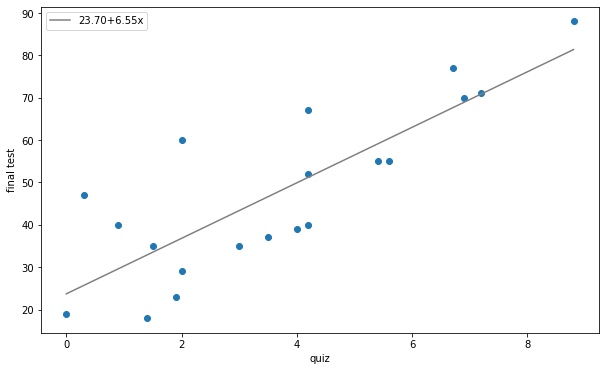

In [4]:
# 산점도와 회귀직선 그리기
poly_fit = np.polyfit(x,y,1)
poly_1d = np.poly1d(poly_fit)
xs = np.linspace(x.min(), x.max())
ys = poly_1d(xs)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
ax.set_xlabel('quiz')
ax.set_ylabel('final test')
ax.plot(xs, ys, color='gray', label=f'{poly_fit[1]:.2f}+{poly_fit[0]:.2f}x')
ax.scatter(x,y)
ax.legend()

plt.show()

In [5]:
# OLS
formula = 'final_test ~ quiz'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     37.61
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           8.59e-06
Time:                        23:23:10   Log-Likelihood:                -76.325
No. Observations:                  20   AIC:                             156.7
Df Residuals:                      18   BIC:                             158.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.6995      4.714      5.028      0.000      13.796      33.603
quiz           6.5537      1.069      6.133      0.000       4.309       8.799
==============================================================================
Omnibus:                        2.139   Durbin-Watson:                   1.478
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.773
Skew:                           0.670   Prob(JB):                        0.412
Kurtosis:                       2.422   Cond. No.                         8.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* 각 행은 다음에 관한 분석 결과
  - Intercept: 절편 $\beta_0$
  - quiz: 기울기 $\beta_1$
* 각 열은 다음을 나타냄
  - coef: 회귀계수의 추정값
  - std err: 추정값의 표준차
  - t: 회귀계수에 관한 t검정통계량
  - P>$\left\lvert{t}\right\rvert$: 검정통계량의 p값
  - [0.025와 0.975]: 회귀계수의 95% 신뢰구간

In [6]:
# 최소제곱법으로 추정량 구하기
# 선형대수학이나 편미분에 관한 지식이 필요한 부분
# 하지만 Numpy로 간단하게 구현
X = np.array([np.ones_like(x),x]).T
X

array([[1. , 4.2],
       [1. , 7.2],
       [1. , 0. ],
       [1. , 3. ],
       [1. , 1.5],
       [1. , 0.9],
       [1. , 1.9],
       [1. , 3.5],
       [1. , 4. ],
       [1. , 5.4],
       [1. , 4.2],
       [1. , 6.9],
       [1. , 2. ],
       [1. , 8.8],
       [1. , 0.3],
       [1. , 6.7],
       [1. , 4.2],
       [1. , 5.6],
       [1. , 1.4],
       [1. , 2. ]])

In [7]:
# 최소제곱법 -> np.linalg.lstsq
# 첫 번째 인수가 설명변수인 X, 두 번째 인수가 반응변수인 y
# 첫 번째 반환값이 구하려는 추정량
beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]
beta0_hat, beta1_hat

<ipython-input-7-5a011dc8d4d5>:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, beta1_hat = np.linalg.lstsq(X,y)[0]


(23.699495346731226, 6.553732606043085)

In [8]:
# 예측값과 잔차 계산
y_hat = beta0_hat + beta1_hat * x
eps_hat = y - y_hat

* 잔차 $\hat{epsilon_i}$는 오차항 $\epsilon_i$에 대응하고 있기 때문에 잔차의 분산으로부터 모분산 $\sigma^2$을 추정할 수 있음
* 다만, 잔차의 자유도는 회귀계수의 수 $p+1$만큼 감소하여 $n-p-1$이 되므로, 모분산의 불편추정량 $\hat{\sigma^2}$은 $n-p-1$로 나누어 계산되는 값
* $\hat{\sigma^2} = {1 \over {n-p-1}}{\sum_i^n(\hat{\epsilon_i} - \bar{\hat{\epsilon}})^2} = {1 \over {n-p-1}}{\sum_i^n{\hat{\epsilon_i^2}}}$

In [9]:
# 이 경우 회귀계수의 수가 2이므로 자유도는 n-2
s_var = np.var(eps_hat, ddof=p+1)
s_var

134.290434734959

In [10]:
# C0, C1을 Numpy로 구할 수 있음
C0, C1 = np.diag(np.linalg.pinv(np.dot(X.T, X)))
C0, C1

(0.16546420022873096, 0.008503003686052104)

In [11]:
# C0, C1을 활용하여 표준오차 계산할 수 있음
np.sqrt(s_var*C0), np.sqrt(s_var*C1)

(4.713837012645705, 1.0685841387335373)

* 회귀계수의 신뢰구간 \
  회귀계수 $\beta_0$, $\beta_1$의 신뢰수준 $100(1-\alpha)$%의 신뢰구간은 \
  $[{\hat{\beta_{i}}} - {t_{\alpha/2}}(n-2){\sqrt{\hat{\sigma^2}}C_i}, {\hat{\beta_{i}}} - {t_{1- \alpha/2}}(n-2){\sqrt{\hat{\sigma^2}}C_i}] (i=0,1)$ \
  으로 추정됨

In [12]:
# beta0_hat의 95% 신뢰구간 구하기
rv = stats.t(n-2)

lcl = beta0_hat - rv.isf(0.025) * np.sqrt(s_var * C0)
hcl = beta0_hat - rv.isf(0.975) * np.sqrt(s_var * C0)
lcl, hcl

(13.79609127276026, 33.602899420702194)

In [13]:
# beta1_hat의 95% 신뢰구간 구하기
rv = stats.t(n-2)

lcl = beta1_hat - rv.isf(0.025) * np.sqrt(s_var * C1)
hcl = beta1_hat - rv.isf(0.975) * np.sqrt(s_var * C1)
lcl, hcl

(4.308720637125893, 8.798744574960278)

In [14]:
t = beta1_hat / np.sqrt(s_var * C1)
t

6.133099274532023

In [15]:
# p깂
(1 - rv.cdf(t)) *2

8.590875866687497e-06

* 귀무가설은 기각되어, 쪽지 시험 평균 점수와 기말고사 점수 사이에는 인과관계가 있다고 말할 수 있음

In [16]:
# beta0에 대한 다음의 가설검정도 동일하게 수행
t = beta0_hat / np.sqrt(s_var * C0)
t

5.027644206440129

In [17]:
(1 - rv.cdf(t)) *2

8.745298393186829e-05

#### 2.중회귀모형(multiple regression model)
* 중회귀모형: 설명변수가 2개 이상인 모형
* $y = {\beta_0} + {{\beta_1}x_1} + \dots + {{\beta_p}x_p}$
  - ex) 기말고사라는 반응변수를 설명하기 위해 설명변수로 쪽지 시험 평균 점수와 시험 전날의 수면 시간을 설정 (이 때 p=2)
  - $Y = {\beta_0} + {{\beta_1}x_{i1}} + {{\beta_2}x_{i2}} + \epsilon_i$
* 가변수(dummy variable)
  - 질적 변수를 어떻게 처리해야할지 생각해볼 필요성 있음
  - 질적변수를 변환하여 양적변수와 동일하게 취급할 수 있게 하는 기법을 도입하면 좋을 듯 $\rightarrow$ 가변수
  - 가변수는 0과 1을 취하는 2진 변수로, 변환하고 싶은 질적변수의 카테고리 수에서 하나를 줄인 수만큼 필요
  - ex) 통학방법이 '버스','자전거','도보' 세 가지일 때, 가변수를 $x_도보, x_자전거$라고 설정할 수 있음
  - 이 가변수에 의해 도보를 $({{x_도보} = 1}, {{x_자전거} = 0})$, 자전거를 $({{x_도보} = 0}, {{x_자전거} = 1})$, 버스를 $({{x_도보} = 0}, {{x_자전거} = 0})$으로 나타낼 수 있음
  - 회귀모형은 $Y_i = {\beta_0} + {{\beta_1}x_{i1}} + {{\beta_2}x_{i2}} + {{\beta_3}x_{i도보}} + {{\beta_4}x_{i자전거}} + {\epsilon_i}$가 됨

In [18]:
# statsmodels로 회귀분석 수행
formula = 'final_test ~ quiz + sleep_time'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     26.35
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           6.19e-06
Time:                        23:23:10   Log-Likelihood:                -73.497
No. Observations:                  20   AIC:                             153.0
Df Residuals:                      17   BIC:                             156.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8709     11.635     -0.161      0.874     -26.420      22.678
quiz           6.4289      0.956      6.725      0.000       4.412       8.446
sleep_time     4.1917      1.778      2.357      0.031       0.440       7.943
==============================================================================
Omnibus:                        2.073   Durbin-Watson:                   1.508
Prob(Omnibus):                  0.355   Jarque-Bera (JB):                1.716
Skew:                           0.660   Prob(JB):                        0.424
Kurtosis:                       2.437   Cond. No.                         38.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
# 중회귀모형의 회귀계수 -> Numpy
x1 = df['quiz']
x2 = df['sleep_time']

y = df['final_test']
p = 2

* $\beta_0,\beta_1,\beta_2$의 추정값인 $\hat{\beta_0},\hat{\beta_1},\hat{\beta_2}$을 구하기
* 단순회귀모형의 경우와 마찬가지로 첫 번째 열은 전부 1, 두 번째 열은 x1, 세 번째 열은 x2가 되는 행렬 X를 생성하고, 최소제곱법을 실행함으로써 구할 수 있음

In [20]:
X = np.array([np.ones_like(x1),x1,x2]).T
beta0_hat, bta1_hat, beta2_hat = np.linalg.lstsq(X,y)[0]
beta0_hat, beta1_hat, beta2_hat

<ipython-input-20-ac660600ab5e>:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  beta0_hat, bta1_hat, beta2_hat = np.linalg.lstsq(X,y)[0]


(-1.8709143470996081, 6.553732606043085, 4.191706546398686)

* $\hat{\beta_0},\hat{\beta_1},\hat{\beta_2}$을 활용하여 예측값 $\hat{y_i} = {\hat{\beta_0}} + {\hat{\beta_1}x_{i1}} + {\hat{\beta_2}x_{2i}}$와 $\hat{\epsilon_i} = {y_i} - {\hat{y_i}}$을 구하기

In [22]:
y_hat = beta0_hat + beta1_hat*x1 + beta2_hat*x2
eps_hat = y - y_hat
eps_hat

0     11.164950
1     -7.430442
2     -1.345130
3    -11.293888
4     -4.397484
5      4.115585
6     -5.605516
7     -1.672317
8     -5.045037
9     -9.957041
10    -4.098271
11     2.757432
12   -14.931862
13     6.628657
14    18.401190
15    12.744861
16    -1.739196
17   -10.429446
18    -6.490308
19    19.421503
dtype: float64

In [23]:
# 표준오차도 단순회귀모형의 경우와 동일
s_var = np.sum(eps_hat**2) / (n-p-1)
C0, C1, C2 = np.diag(np.linalg.pinv(np.dot(X.T,X)))

In [24]:
# 이것들을 활용하여 수면시간에 대한 계숭인 beta2의 95% 신뢰구간을 구해본다
rv = stats.t(n-p-1)

lcl = beta2_hat - rv.isf(0.025) * np.sqrt(s_var*C2)
hcl = beta2_hat - rv.isf(0.975) * np.sqrt(s_var*C2)
lcl,hcl # statsmodels의 결과와 일치

(0.4340116832867875, 7.9494014095105845)

In [26]:
# statsmodels은 질적변수를 가변수로 변환하는 것을 자동으로 처리해줌
formula = 'final_test ~ quiz + sleep_time + school_method'
result = smf.ols(formula, df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             final_test   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     13.46
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           7.47e-05
Time:                        23:45:34   Log-Likelihood:                -72.368
No. Observations:                  20   AIC:                             154.7
Df Residuals:                      15   BIC:                             159.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 1.3330     12.434      0.107      0.916     -25.169      27.835
school_method[T.bus]     -1.8118      6.324     -0.286      0.778     -15.292      11.668
school_method[T.walk]    -7.6555      6.420     -1.192      0.252     -21.339       6.028
quiz                      6.0029      1.033      5.809      0.000       3.800       8.206
sleep_time                4.5238      1.809      2.501      0.024       0.668       8.380
==============================================================================
Omnibus:                        1.764   Durbin-Watson:                   1.418
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.989
Skew:                           0.545   Prob(JB):                        0.610
Kurtosis:                       2.985   Cond. No.                         41.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 3. 모형의 선택

#### 4. 모형의 타당성